#  Introduction

The goal of this Capstone project is to demonstrate the application of Exploratory Data Analysis(EDS) in a business scenario. This project will depict how data can be used in the financial services industry to minimize financial losses when lending to customers. While doing so we will also obtain insights on risk analytics.

This project aims to address the following questions: 
- What should the initial steps be while handling such large datasets? 
- What strategies should be used when dealing with missing data to ensure accuracy? 
- How can we understand loan applicants' behavior and the behavior of the ones that default? 
- How are we to work with outliers and different data types? 
- What features are relevant to our dataset and analysis?
- Does the current loan approval criteria need to be reevaluated?

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
!pip install pandas_profiling 
import pandas_profiling

pd.options.display.max_columns = None
pd.options.display.max_rows = None 

# Filtering Out Warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\pulki\AppData\Local\Temp\ipykernel_38008\437743867.py:7: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [2]:
%matplotlib inline

In [3]:
# Filtering Out Warnings
import warnings
warnings.filterwarnings('ignore')

# Reading & Understanding Data

In [4]:
#load dataset 
df=pd.read_csv('application_data.csv', header=0)

In [5]:
#Getting a data summary
application_report = pandas_profiling.ProfileReport(df, minimal=True, \
                                                    title='Application dataframe profiling')

application_report.to_notebook_iframe()
application_report.to_file('application_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#checking the shape of the dataset.
df.shape

(307511, 122)

In [7]:
#checking all the data types of the dataset 
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [8]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

# Cleaning Datset

In [9]:
#Checking all avaiable columns
print(df.columns.tolist())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [10]:
# % null value in each column  
round(df.isnull().sum()/df.shape[0]*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

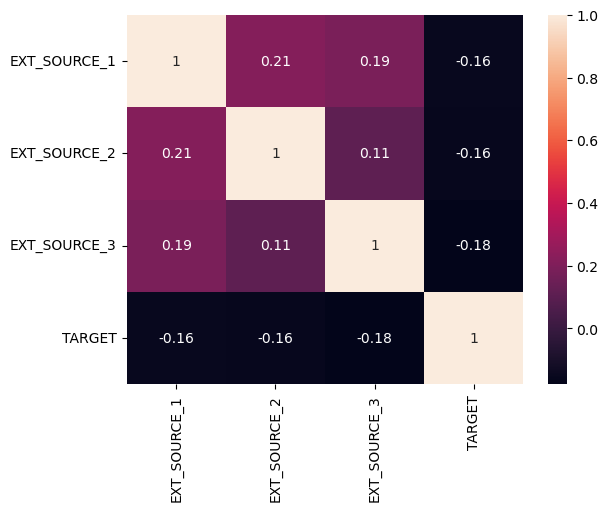

In [11]:
#Checking for any coorelation between EXT_source columns vs Target  column. 
source_target = df[["EXT_SOURCE_1","EXT_SOURCE_2", "EXT_SOURCE_3", "TARGET"]] 
source_target_corr = source_target.corr() 
ax = sns.heatmap(source_target_corr, 
                annot = True)
# There is negligible coorelation between EXT_source documents and TARGET column so we can remove these in the future. 

In [12]:
source_target_corr

EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3    TARGET
EXT_SOURCE_1      1.000000      0.213982      0.186846 -0.155317
EXT_SOURCE_2      0.213982      1.000000      0.109167 -0.160472
EXT_SOURCE_3      0.186846      0.109167      1.000000 -0.178919
TARGET           -0.155317     -0.160472     -0.178919  1.000000

In [13]:
#checking relevance of Flag_documents and if it affects loan repayment. 
doc_columns =['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 
              'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 
              'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 
              'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'] 
flag_df = df[doc_columns + ["TARGET"]]

length = len(doc_columns) 
flag_df["TARGET"] = flag_df["TARGET"].replace({1:"Defaulter", 0 : "repayer"})

fig = plt.figure(figsize = (21,24))



<Figure size 2100x2400 with 0 Axes>

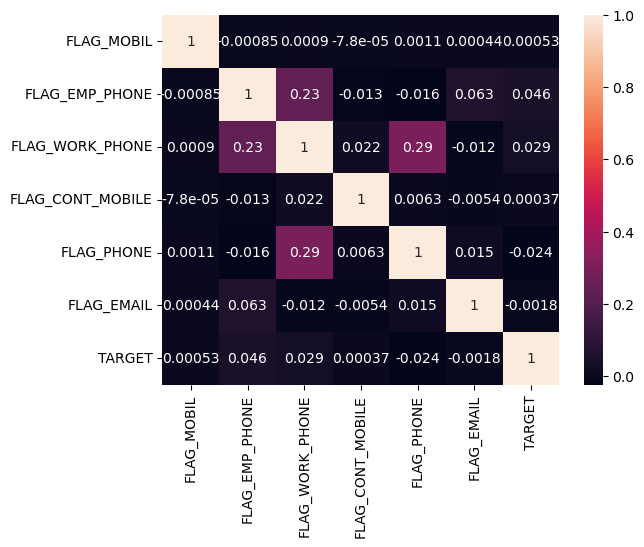

In [14]:
#checking coorelation between mobile phone, work phone and email with the clients abilityto payback the laon. 
contact_columns = df[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'TARGET']]
contact_columns_corr = contact_columns.corr() 
ax = sns.heatmap(contact_columns_corr , annot = True)  
plt.show()
#This information has no correlation with loan repayment and can be deleted. 

In [15]:
#filling null values 
numeric_value_appl = df.select_dtypes(include=['int', 'float']).fillna(-1)  
categorical_value_appl = df.select_dtypes(include=['object']).fillna('None')

application_cleaned = numeric_value_appl.join(categorical_value_appl)

In [16]:
#removing unwanted columns 
df = df[['SK_ID_CURR',
    'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
    #'NAME_TYPE_SUITE', 
    'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
    #'REGION_POPULATION_RELATIVE', 
    'DAYS_BIRTH', 'DAYS_EMPLOYED', 
    #'DAYS_REGISTRATION', 
    'DAYS_ID_PUBLISH', 
    #'OWN_CAR_AGE', 
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
    #'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 
    #'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
    #'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].copy()


In [17]:
df.shape

(307511, 46)

In [18]:
df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
R

In [19]:
#checking if there are any duplicate values that exist. 
df.loc[df.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR]
Index: []

# Analyzing and Organzing Data

In [20]:
#checking how many people have been late and defaulted on payments
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [21]:
df['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
12         2
10         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

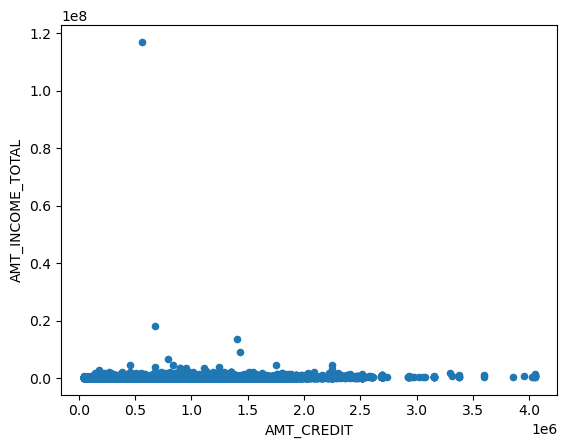

In [22]:
df.plot(kind = 'scatter',
        y= 'AMT_INCOME_TOTAL', 
        x = 'AMT_CREDIT')
plt.show()

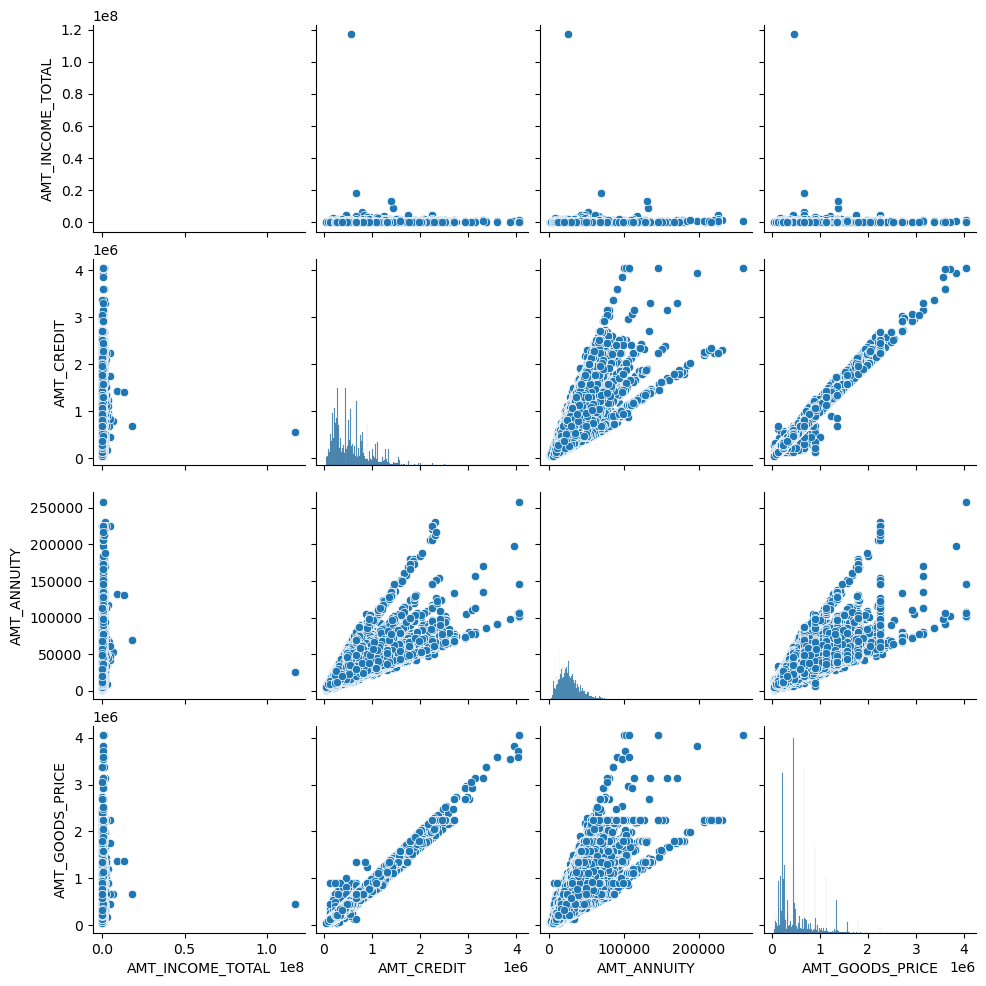

In [23]:
sns.pairplot(df, vars = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',])
plt.show()

In [24]:
df_corr = df[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'TARGET']].dropna().corr()
df_corr

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.156725     0.191512         0.159607   
AMT_CREDIT                0.156725    1.000000     0.769940         0.986968   
AMT_ANNUITY               0.191512    0.769940     1.000000         0.775109   
AMT_GOODS_PRICE           0.159607    0.986968     0.775109         1.000000   
TARGET                   -0.003963   -0.030390    -0.012819        -0.039647   

                    TARGET  
AMT_INCOME_TOTAL -0.003963  
AMT_CREDIT       -0.030390  
AMT_ANNUITY      -0.012819  
AMT_GOODS_PRICE  -0.039647  
TARGET            1.000000

<AxesSubplot:>

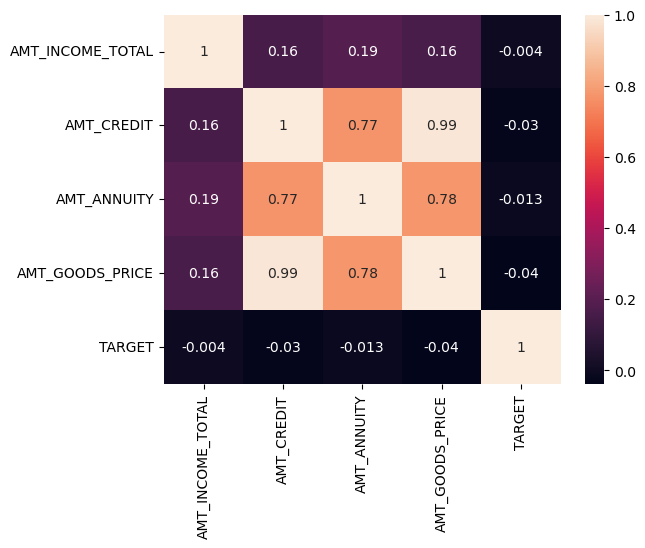

In [25]:
sns.heatmap(df_corr, annot = True)

In [26]:
# Standardizing values 
dates_column = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']                                                                                                                                               


for column in dates_column: 
    df[column] = abs(df[column])

In [69]:
#Binning Columns for income
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/100000 

labels = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k',
          '700k-800k','800k-900k','900k-1M', '1M Above']

df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins = 11 , labels = labels)

In [66]:
df['AMT_INCOME_RANGE'].value_counts(normalize = True)*100

0-100K       99.999024
100K-200K     0.000650
1M Above      0.000325
200k-300k     0.000000
300k-400k     0.000000
400k-500k     0.000000
500k-600k     0.000000
600k-700k     0.000000
700k-800k     0.000000
800k-900k     0.000000
900k-1M       0.000000
Name: AMT_INCOME_RANGE, dtype: float64

In [29]:
#Binning columns for loan amounts 
df['AMT_CREDIT'] = df['AMT_CREDIT']/100000 

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels = slots)


In [30]:
df['AMT_CREDIT_RANGE'].value_counts(normalize = True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [31]:
#Creating binning for age 
df['AGE'] = df['DAYS_BIRTH']//365 
bins = [0,20,30,40,50,100]
slots = ['0-20', '20-30','30-40','40-50','50 above']

df['AGE_GROUP'] = pd.cut(df['AGE'], bins = bins, labels = slots )

df['AGE_GROUP2'] = df['AGE_GROUP'].value_counts(normalize = True)*100 

In [32]:
#Creating bins for employment time 
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED']/365 
bins = [0,5,10,20,30,40,50,60,150] 
slots = ['0-5', '5-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60 above']

df['EMPLOYMENT_YEAR'] = pd.cut(df['YEARS_EMPLOYED'], bins = bins, labels = slots)  

df['EMPLOYMENT_YEAR'].value_counts(normalize = True)*100

0-5         54.061911
5-10        25.729074
10-20       15.229143
20-30        3.788050
30-40        1.099014
40-50        0.092807
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

# Deep Dive Analysis 

In [33]:
#Utility function 
def plot_feature_count(df, feature, target = "TARGET", figsize = (8, 6), rot = 0, logy = False, title = "", legend_labels = ("Repaid", "Default")):
    plt.figure(figsize = figsize)

    ax = sns.countplot(data = df, 
                       x = feature,
                       hue = target, 
                       order = df[feature].value_counts().index)

    for i in ax.containers:
        ax.bar_label(i)
        
    if logy:
        plt.yscale('log')
        
    if rot:
        plt.xticks(rotation = rot)
    
    if legend_labels:
        plt.legend(legend_labels)
        
    plt.title(title)
    plt.show()
    
def plot_numerical_feature(df, feature, figsize = (20, 8)):
    fig, ax = plt.subplots(1, 2, figsize = figsize)
    
    ax[0].set_title(f"{feature} distribution in the data")
    sns.histplot(data = df, 
                 x = feature, 
                 kde = True, 
                 stat = "probability",
                 ax = ax[0])
    
    ax[1].set_title(f"{feature} distribution for repaying and defaulting applicants")
    sns.violinplot(data = df, 
                   x = feature, 
                   y = "TARGET", 
                   orient = "h",
                   ax = ax[1])
    ax[1].set_yticks((0, 1), ("Repaid", "Default"))
    
    plt.show()
    
def get_null_percentage(df):
    return df.isnull().sum() / len(df) * 100.00


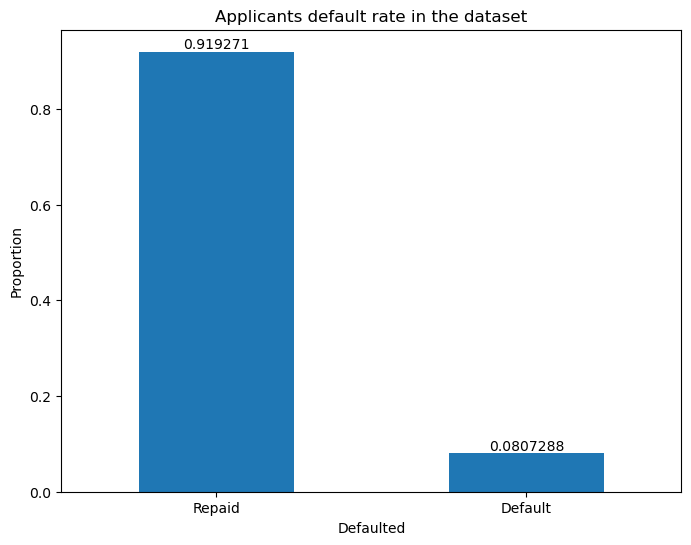

In [34]:
ax = df["TARGET"].value_counts(normalize = True)\
                             .plot(kind = "bar", 
                                   figsize = (8, 6),
                                   title = "Applicants default rate in the dataset",
                                   xlabel = "Defaulted",
                                   ylabel = "Proportion",
                                   rot = 0)
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks([0, 1], ["Repaid", "Default"])
plt.show()

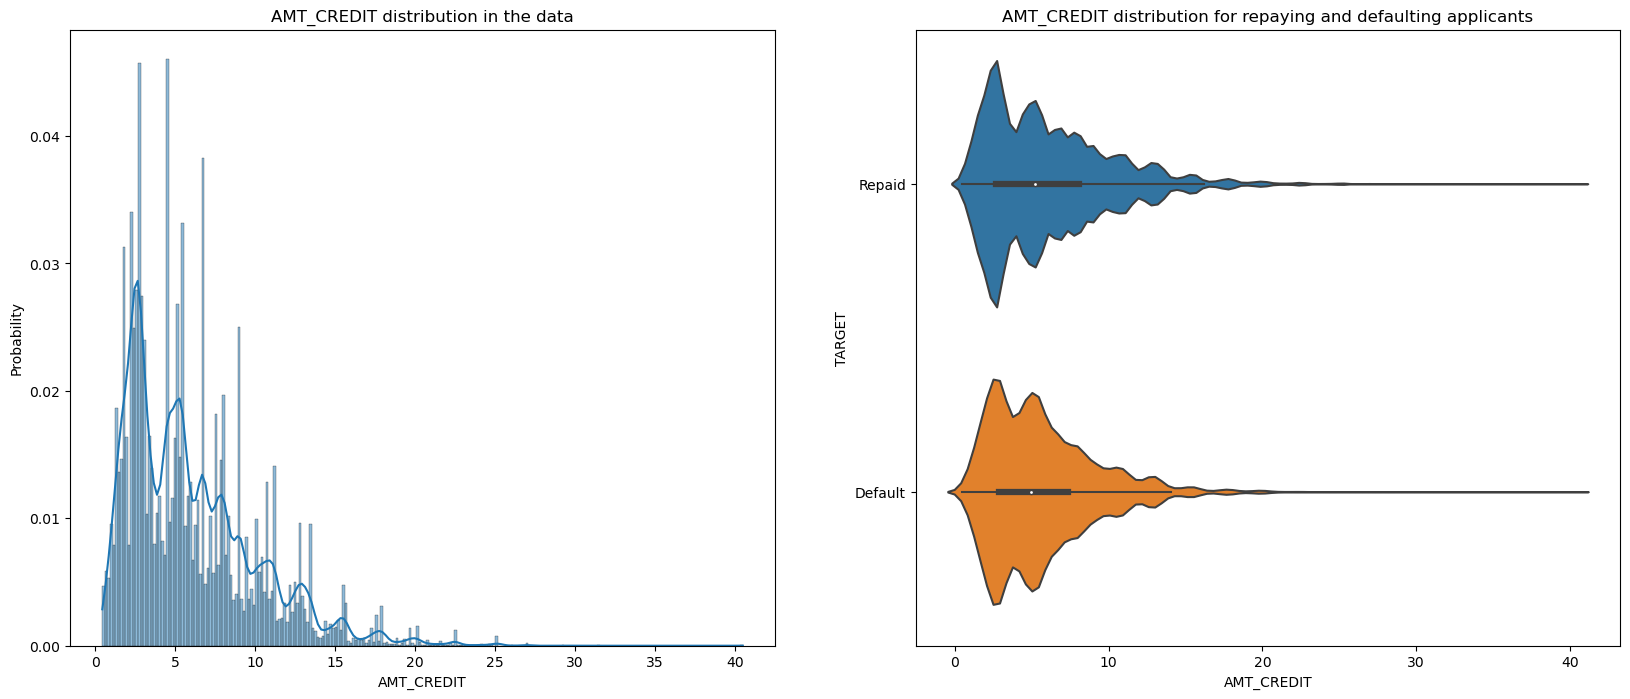

In [35]:
plot_numerical_feature(df, "AMT_CREDIT")

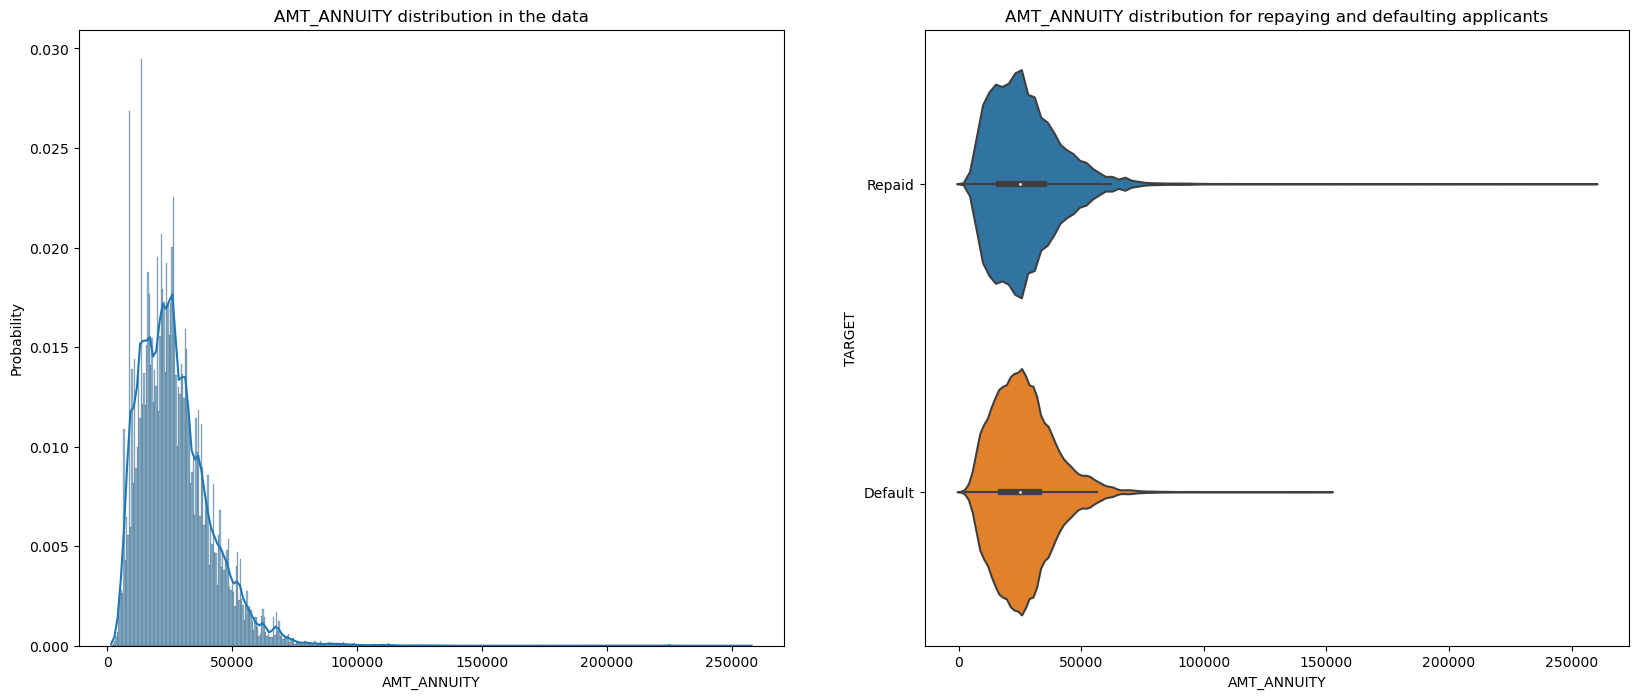

In [36]:
plot_numerical_feature(df, "AMT_ANNUITY")

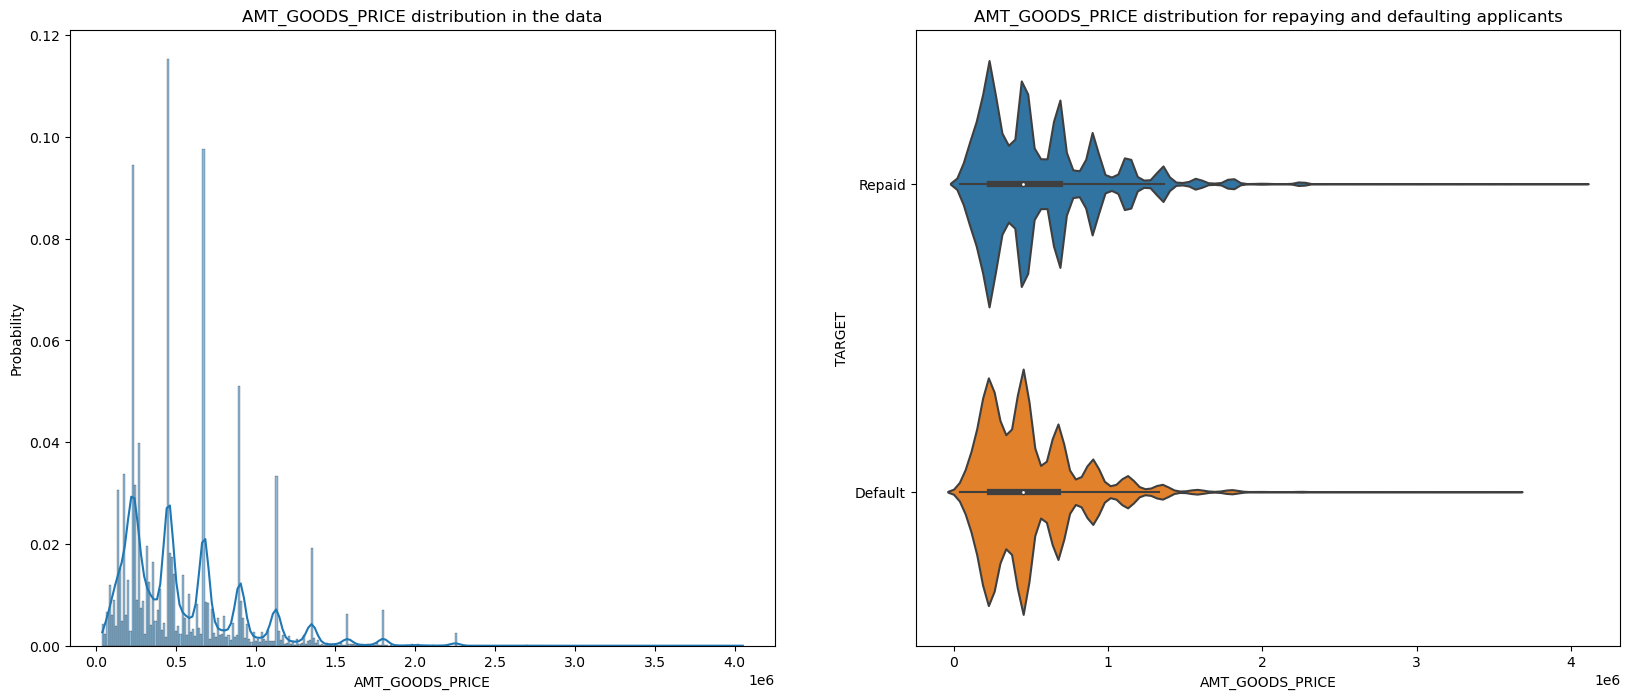

In [37]:
plot_numerical_feature(df, "AMT_GOODS_PRICE")

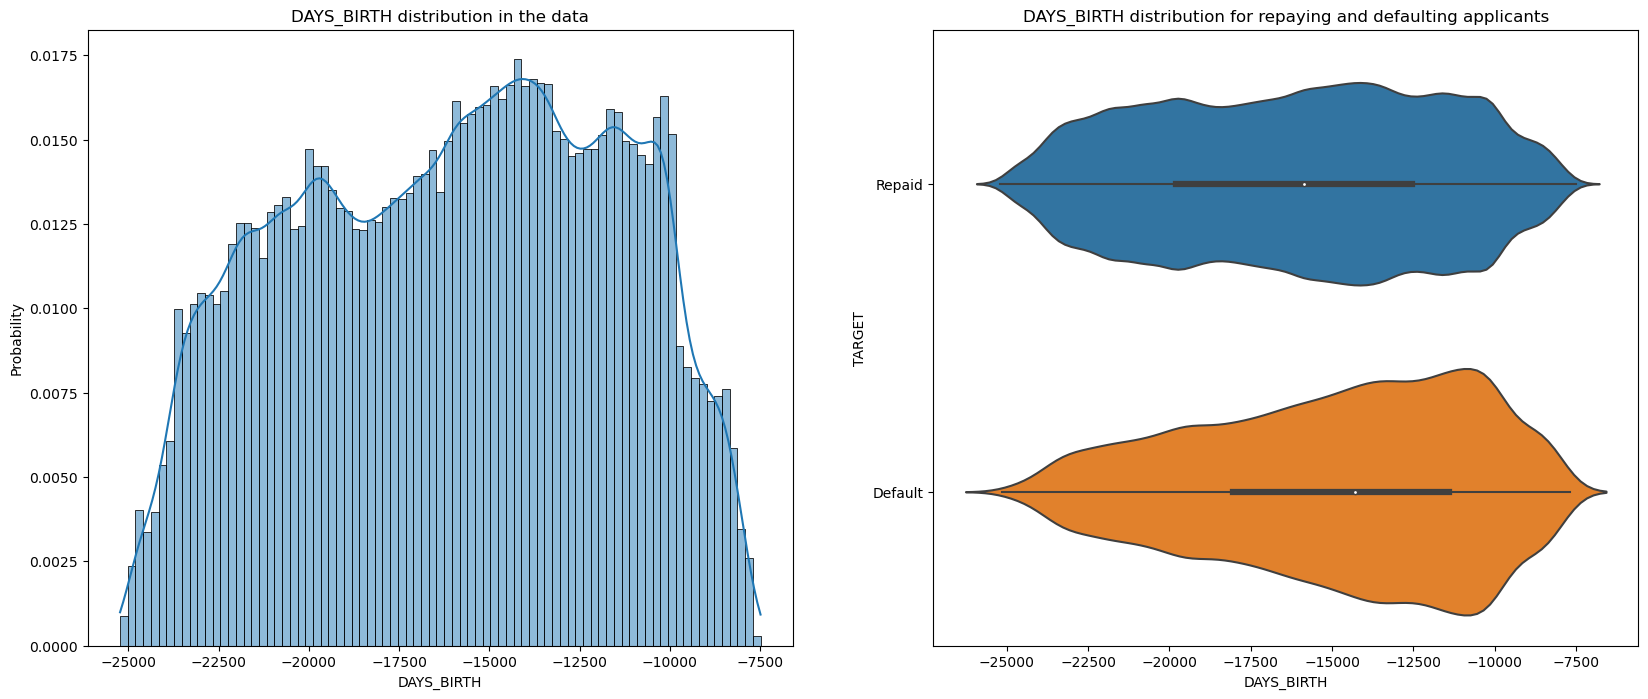

In [38]:
df['DAYS_BIRTH'] =  -df['DAYS_BIRTH'] 
plot_numerical_feature(df, "DAYS_BIRTH")

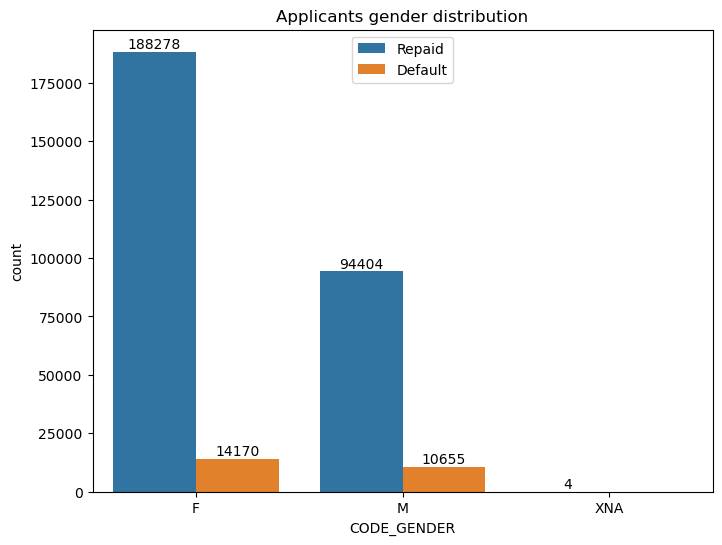

In [39]:
#Distribution based on gender
plot_feature_count(df, "CODE_GENDER", title = "Applicants gender distribution")

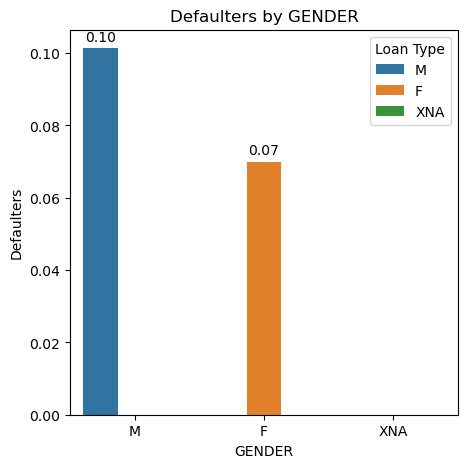

In [40]:
#Defaulters based on applicant's Gender.
fig, ax = plt.subplots(figsize=(5, 5))

sns.barplot(data=df, x='CODE_GENDER', y='TARGET', hue='CODE_GENDER', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by GENDER')
plt.xlabel('GENDER')
plt.legend(title='Loan Type')  

# Display the percentage values on the first bar ('Cash loans') using ax.bar_label()
ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

# Display the percentage values on the second bar ('Revolving loans') using ax.bar_label()
ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()

-66% of applicants in the datset are feamle which means in general there are more females taking out loans. 
-From the above graph, female applicants default 7% of the time where as more male applicants default with 10%. 


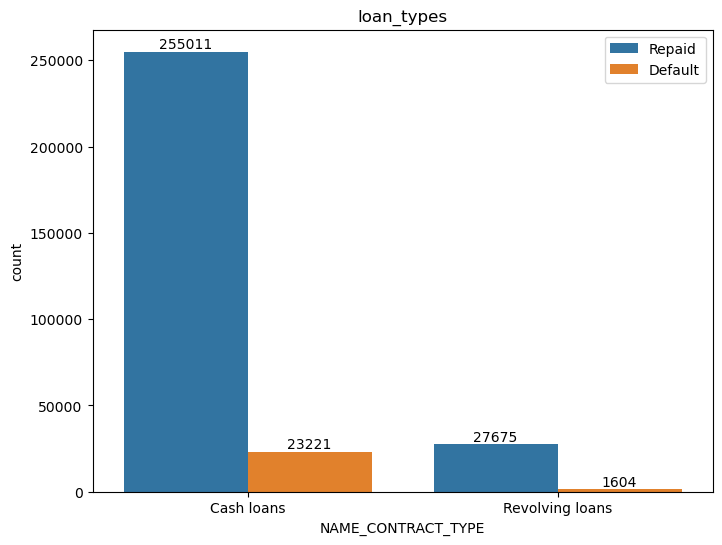

In [41]:
#What type of loans are paid more often.
plot_feature_count(df, "NAME_CONTRACT_TYPE", title = "loan_types")

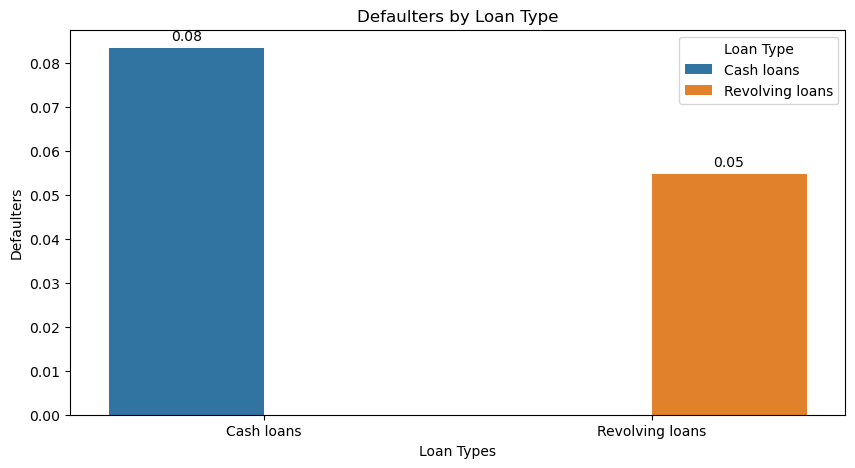

In [42]:
#Defaulters based on applicant's Loan Type.
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df, x='NAME_CONTRACT_TYPE', y='TARGET', hue='NAME_CONTRACT_TYPE', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Loan Type')
plt.xlabel('Loan Types')
plt.legend(title='Loan Type')  # Add a legend with the title 'Loan Type'

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()



-90% of the loans given out are cash loans. 
-They are also the ones that are defaulted on more with a default rate of 8.2% in contrast to revolving loans with a default raTE OF 5.5%. 

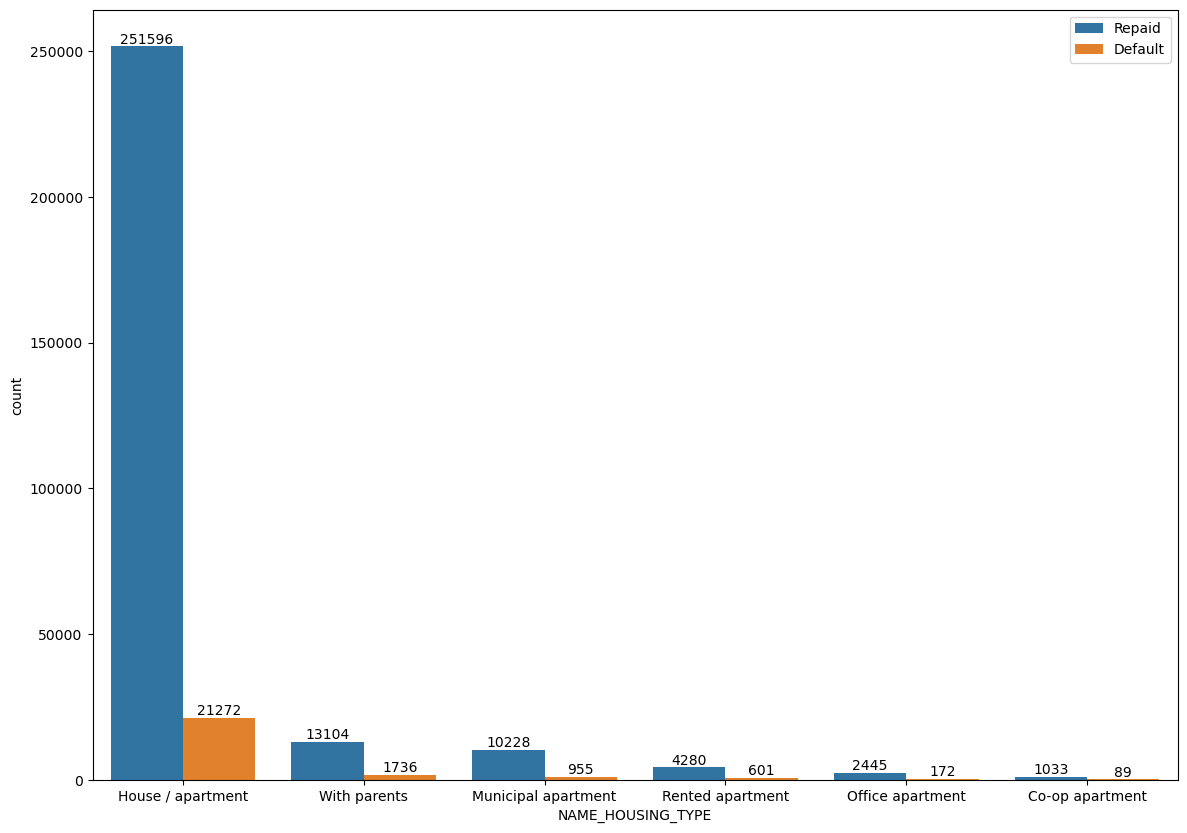

In [43]:
#Data distribution based on applicant's hosuing type.
plot_feature_count(df,"NAME_HOUSING_TYPE", figsize = (14,10))

-About 89 %percent of the applicants live in their own house/apartment. 
-Data distribution depicts that applicants who have rented apartments and the ones who live with their parents tend to repay less loans with a deafault rate of 12% approximately.

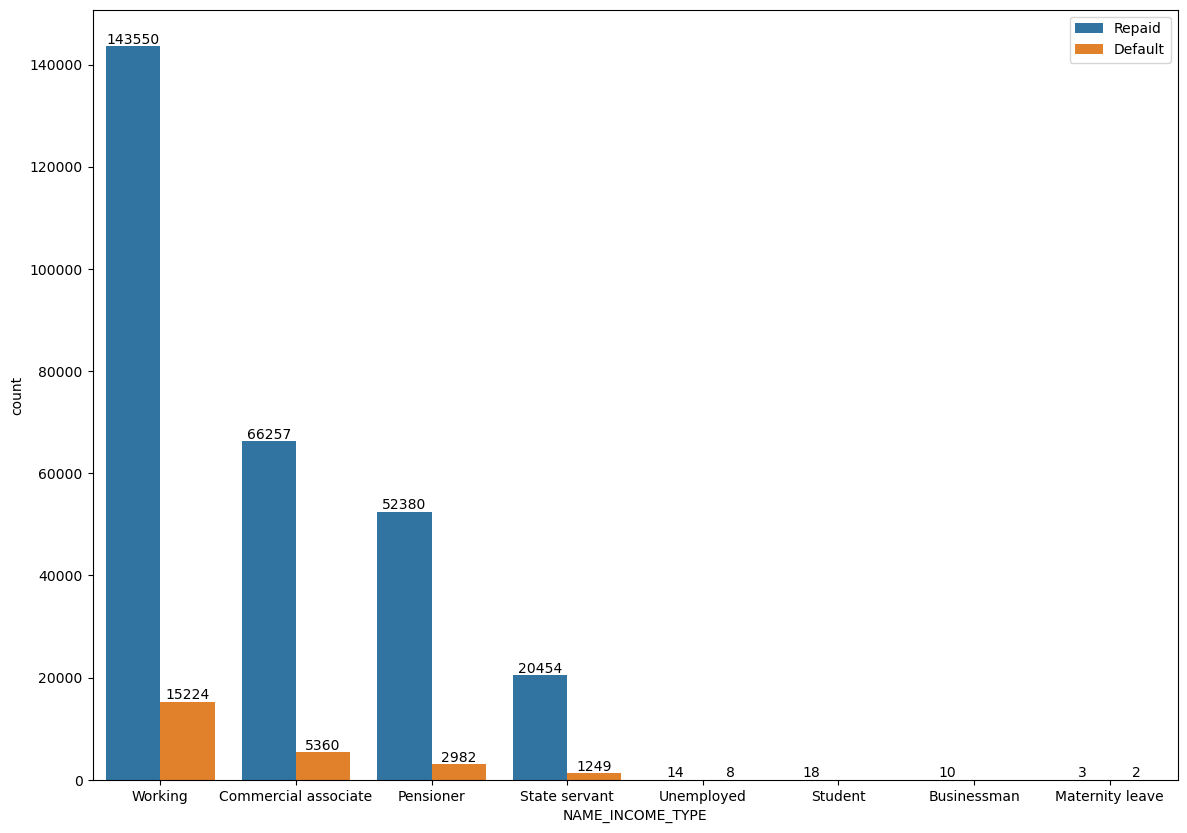

In [44]:
#Data distribution based on applicant's income type.
plot_feature_count(df,"NAME_INCOME_TYPE", figsize = (14,10))

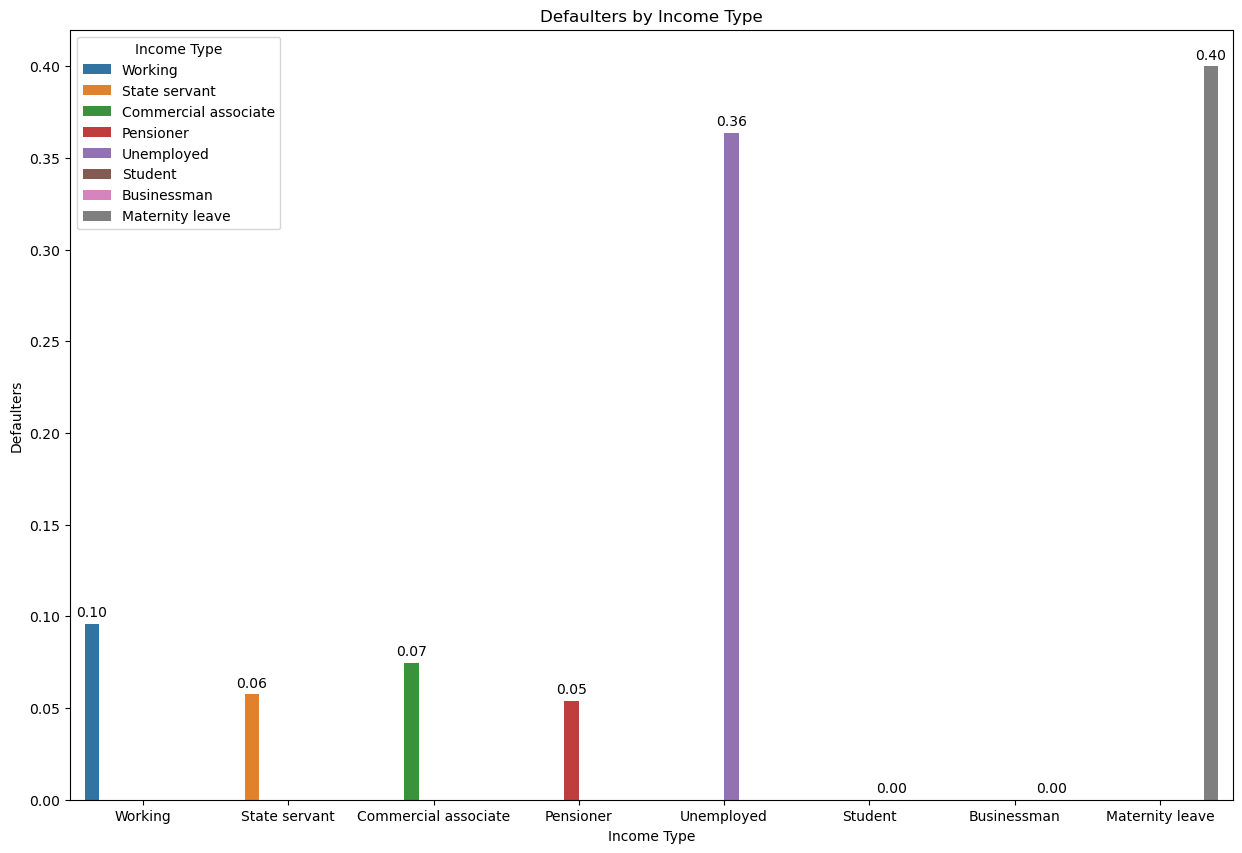

In [45]:
#Defaulters based on applicant's Income Type.
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='NAME_INCOME_TYPE', y='TARGET', hue='NAME_INCOME_TYPE', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Income Type')
plt.xlabel('Income Type')
plt.legend(title='Income Type')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[5], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[6], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[7], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()

In [46]:
df["NAME_INCOME_TYPE"].value_counts('Working')

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

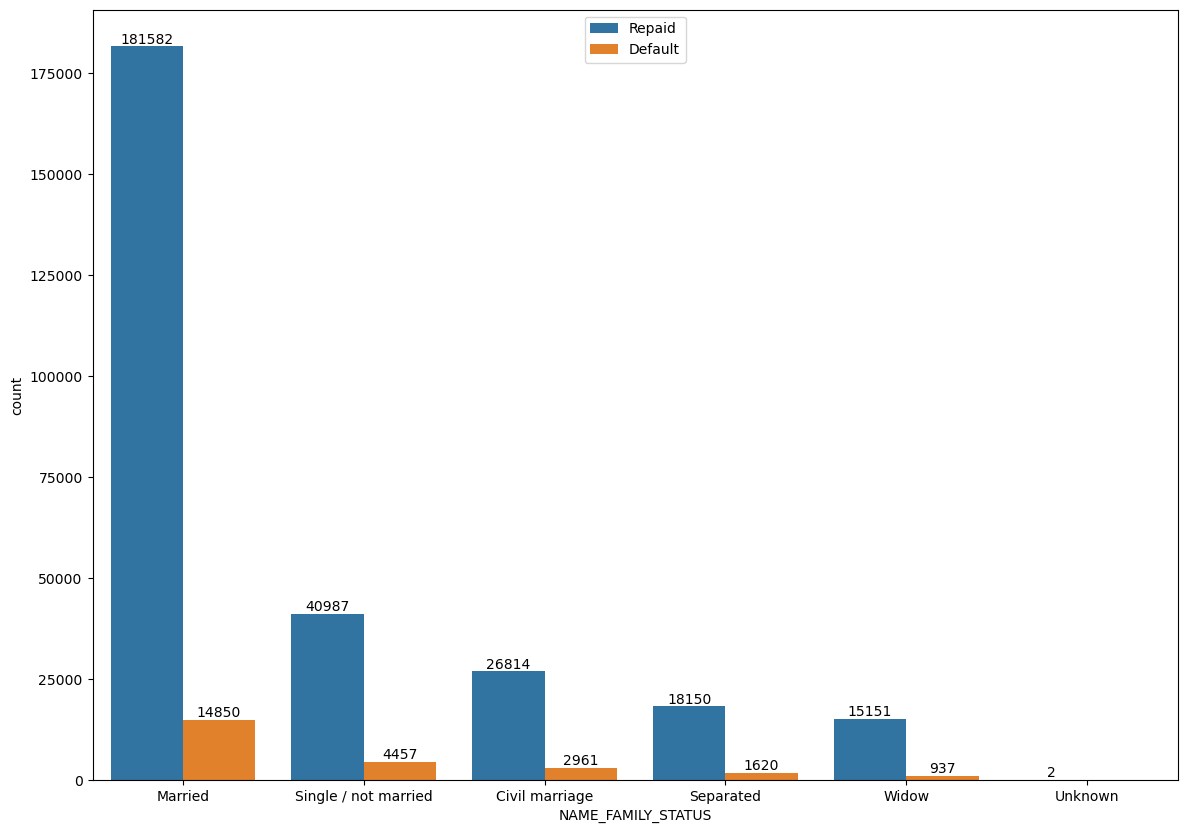

In [47]:
#Data distribution based on applicant's family status.
plot_feature_count(df, "NAME_FAMILY_STATUS", figsize = (14, 10))

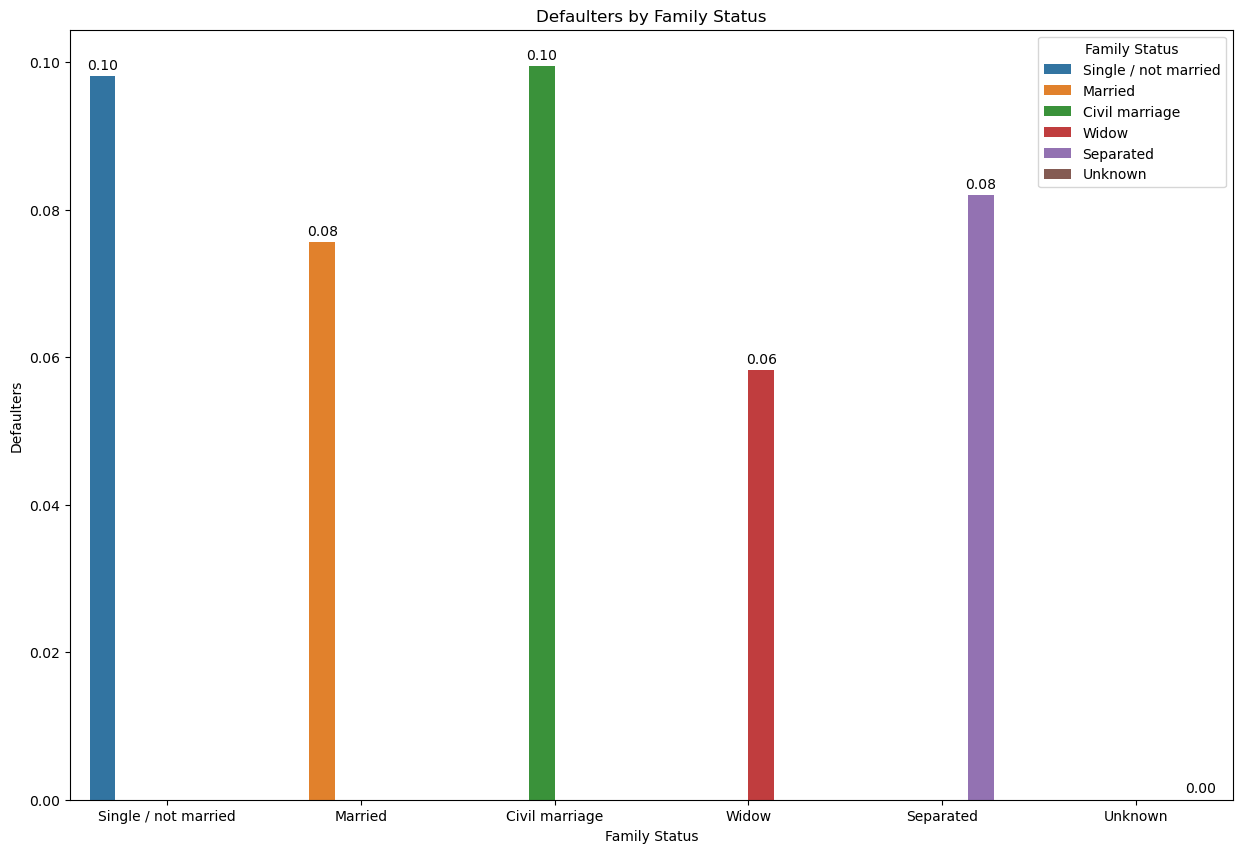

In [48]:
#Defaulters based on applicant's family status.
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='NAME_FAMILY_STATUS', y='TARGET', hue='NAME_FAMILY_STATUS', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Family Status')
plt.xlabel('Family Status')
plt.legend(title='Family Status')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[5], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()

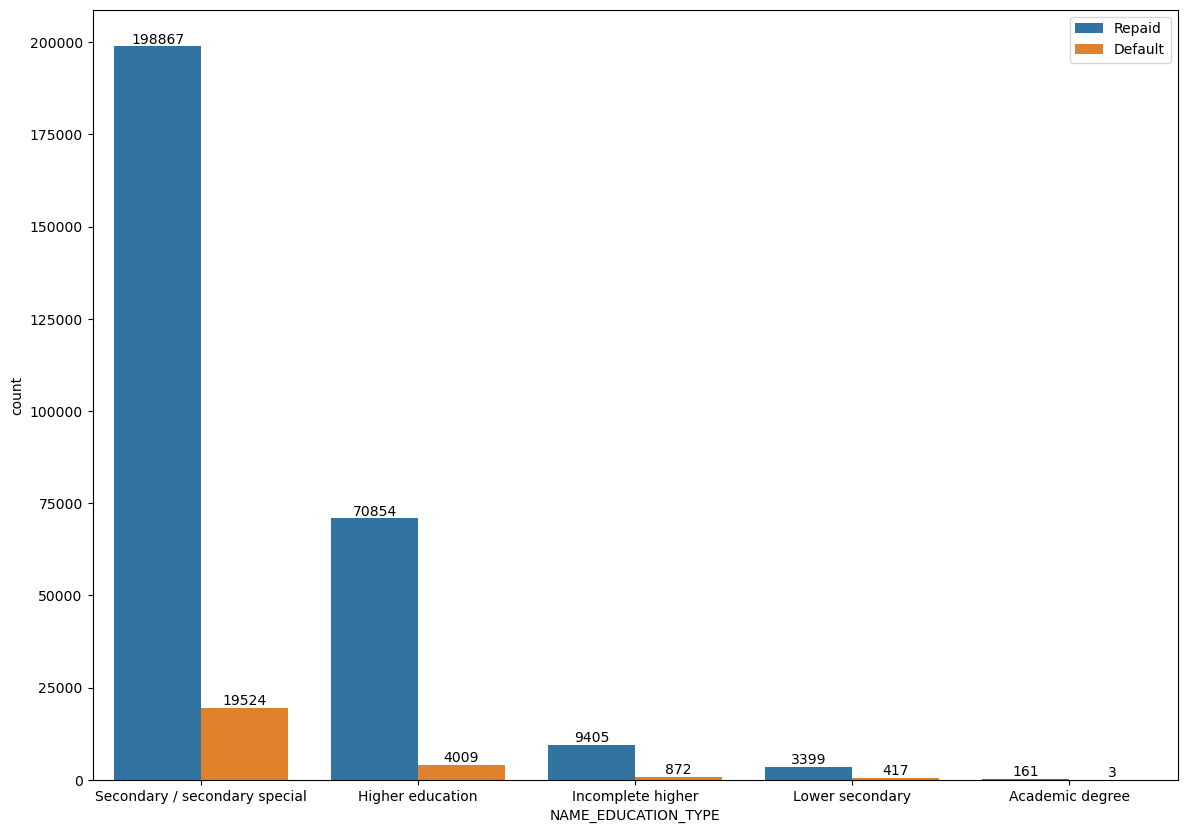

In [49]:
#Data distribution based on applicant's ed.
plot_feature_count(df, "NAME_EDUCATION_TYPE", figsize = (14, 10))

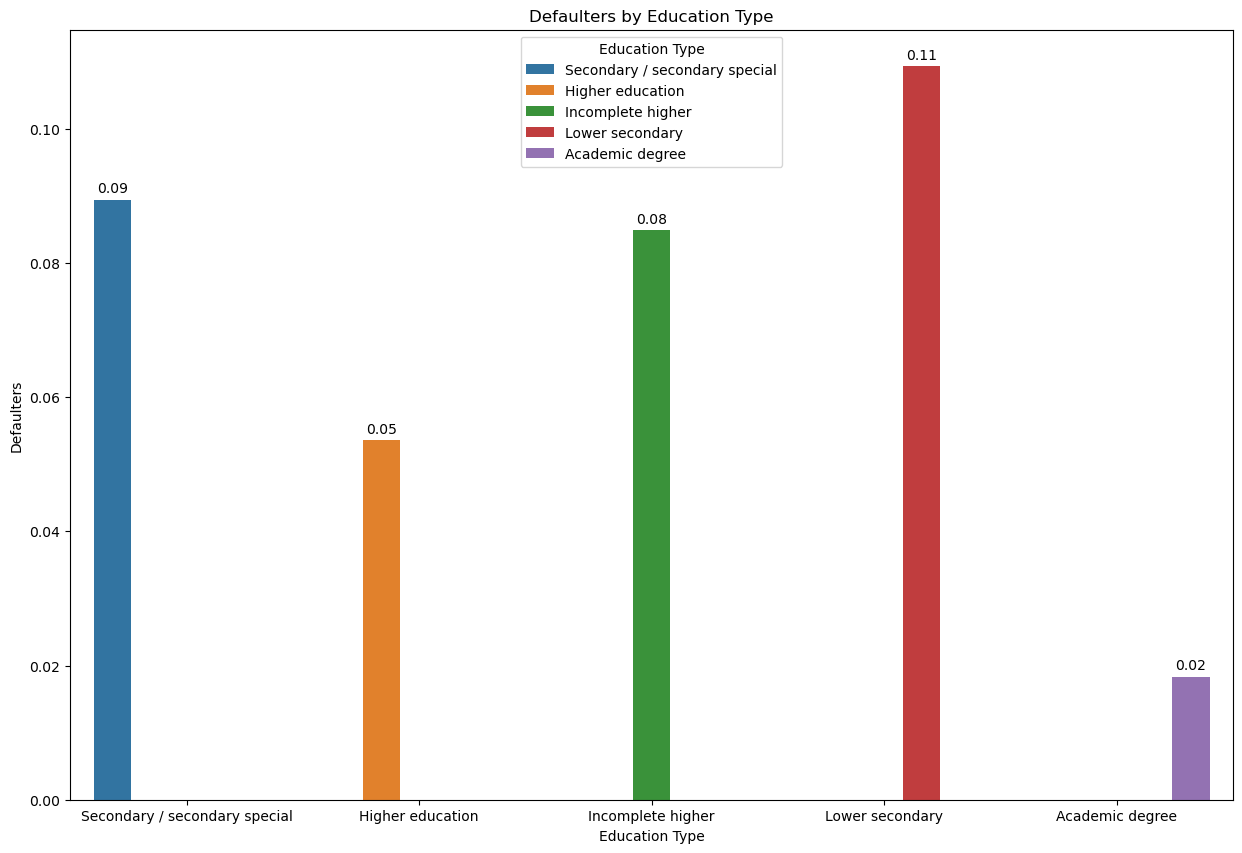

In [50]:
#Defaulters by Education Type
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='NAME_EDUCATION_TYPE', y='TARGET', hue='NAME_EDUCATION_TYPE', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Education Type')
plt.xlabel('Education Type')
plt.legend(title='Education Type')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()

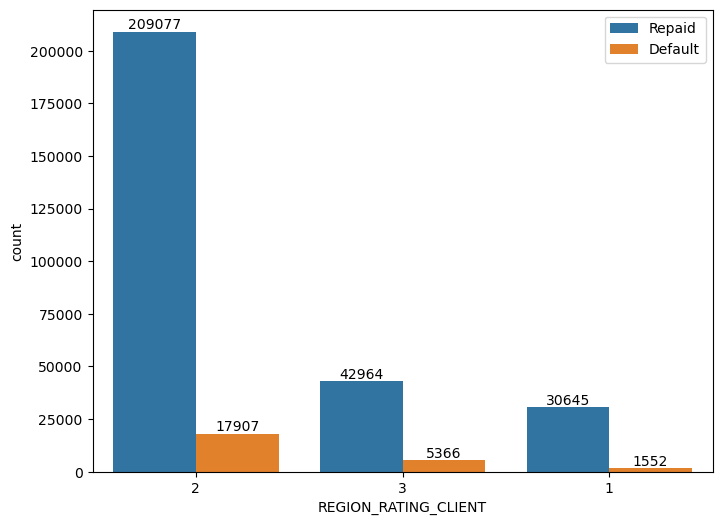

In [51]:
#Data distribution based on applicant's Region.
plot_feature_count(df, "REGION_RATING_CLIENT")

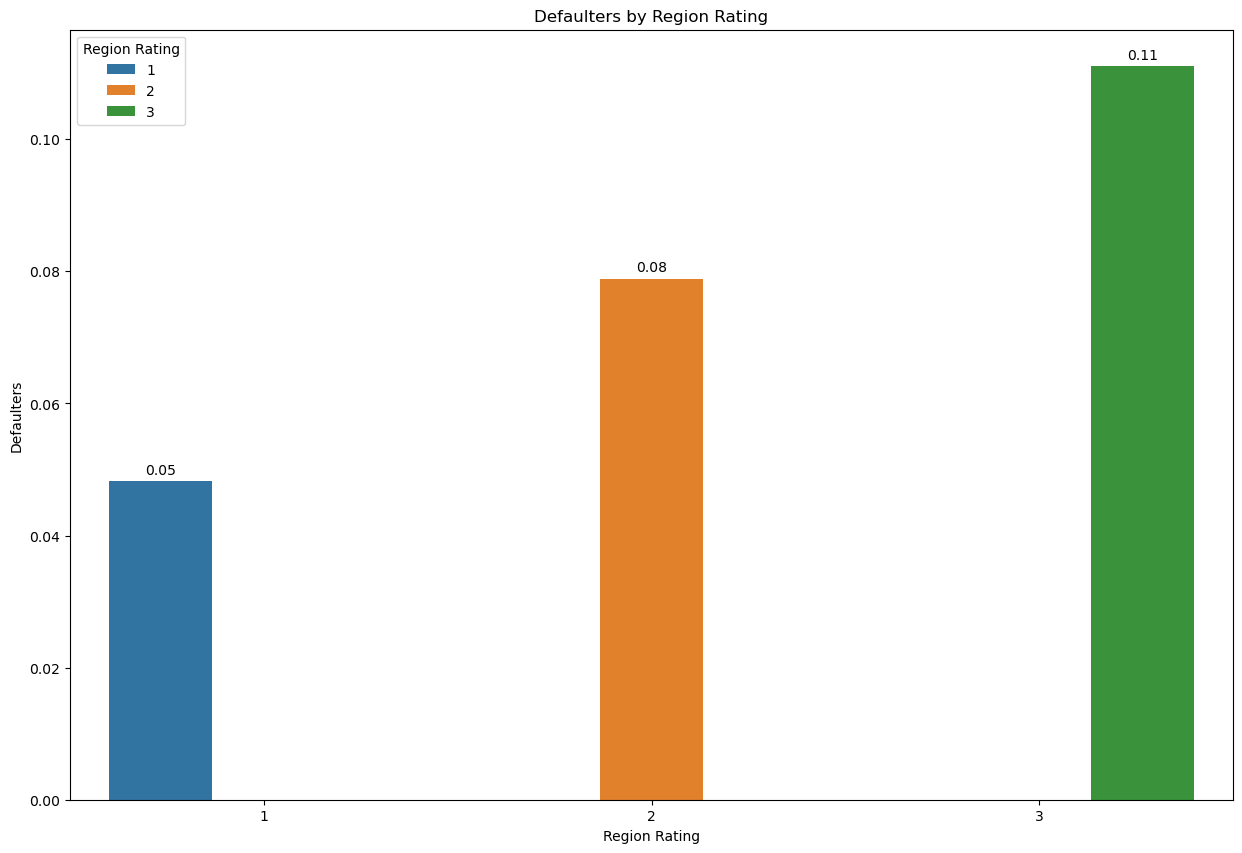

In [52]:
#Defaulters by Region 
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='REGION_RATING_CLIENT', y='TARGET', hue='REGION_RATING_CLIENT', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Region Rating')
plt.xlabel('Region Rating')
plt.legend(title='Region Rating')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

plt.show()

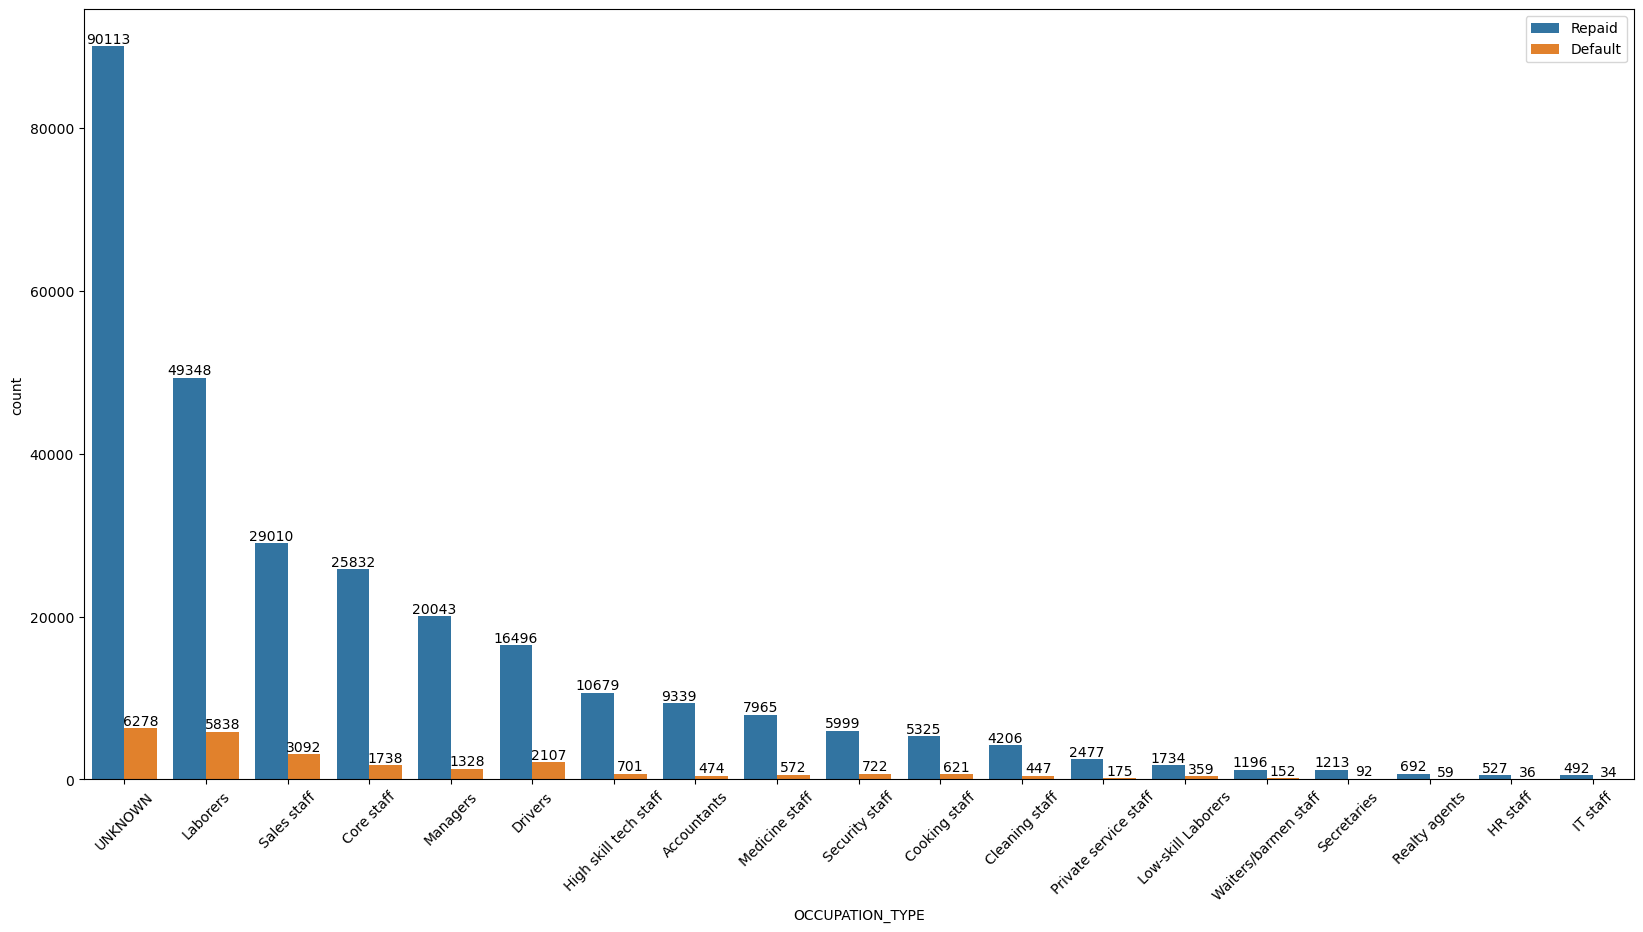

In [53]:
#Data distribution based on applicant's occupation type.
occupation_type_df = df[['OCCUPATION_TYPE', "TARGET"]] 
occupation_type_df['OCCUPATION_TYPE'].fillna("UNKNOWN", inplace = True) 
plot_feature_count(occupation_type_df, "OCCUPATION_TYPE", figsize = (20,10), rot = 45)

In [54]:
occupation_type_df["OCCUPATION_TYPE"].value_counts("UNKNOWN")

UNKNOWN                  0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

In [55]:
# Creating dataframe or series for defaulters by occuption type
df_B = (occupation_type_df["OCCUPATION_TYPE"].value_counts(normalize=True).rename('OCCUPATION_TYPE_%')*100).round(2)
df_C = (occupation_type_df["OCCUPATION_TYPE"].value_counts().rename('APPLICANTS_AMT_BY_OCCUPATION')).round(2)

In [56]:
#filtering by defaulters 
df_def = df[df['TARGET']==1] 
defaulters = (df_def["OCCUPATION_TYPE"].value_counts(normalize = True).rename('DEFAULTER_%')*100).round(2)
#filtering by repayers 
df_rep = df[df['TARGET']==0] 
repayers = (df_rep["OCCUPATION_TYPE"].value_counts(normalize = True).rename('REPAYER%')*100).round(2)

In [57]:
#Distribution in table
pd.concat([df_B, df_C, defaulters, repayers], axis = 1) 

OCCUPATION_TYPE_%  APPLICANTS_AMT_BY_OCCUPATION  \
UNKNOWN                            31.35                         96391   
Laborers                           17.95                         55186   
Sales staff                        10.44                         32102   
Core staff                          8.97                         27570   
Managers                            6.95                         21371   
Drivers                             6.05                         18603   
High skill tech staff               3.70                         11380   
Accountants                         3.19                          9813   
Medicine staff                      2.78                          8537   
Security staff                      2.19                          6721   
Cooking staff                       1.93                          5946   
Cleaning staff                      1.51                          4653   
Private service staff               0.86                          2652   
Low-skill Laborers                  0.68                          2093   
Waiters/barmen staff                0.44                          1348   
Secretaries                         0.42                          1305   
Realty agents                       0.24                           751   
HR staff                            0.18                           563   
IT staff                            0.17                           526   

                       DEFAULTER_%  REPAYER%  
UNKNOWN                        NaN       NaN  
Laborers                     31.48     25.63  
Sales staff                  16.67     15.06  
Core staff                    9.37     13.41  
Managers                      7.16     10.41  
Drivers                      11.36      8.57  
High skill tech staff         3.78      5.55  
Accountants                   2.56      4.85  
Medicine staff                3.08      4.14  
Security staff                3.89      3.12  
Cooking staff                 3.35      2.77  
Cleaning staff                2.41      2.18  
Private service staff         0.94      1.29  
Low-skill Laborers            1.94      0.90  
Waiters/barmen staff          0.82      0.62  
Secretaries                   0.50      0.63  
Realty agents                 0.32      0.36  
HR staff                      0.19      0.27  
IT staff                      0.18      0.26

-Around 31% of applicants did not provide their occupation type. 
-Second highest job type reported was laborers with 18% of applicants in that profession. These applicants have a high default rate of 10.6%. 
-IT was the lowest reported job with only 0.17% of applicants reporting it.  


In [58]:
df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

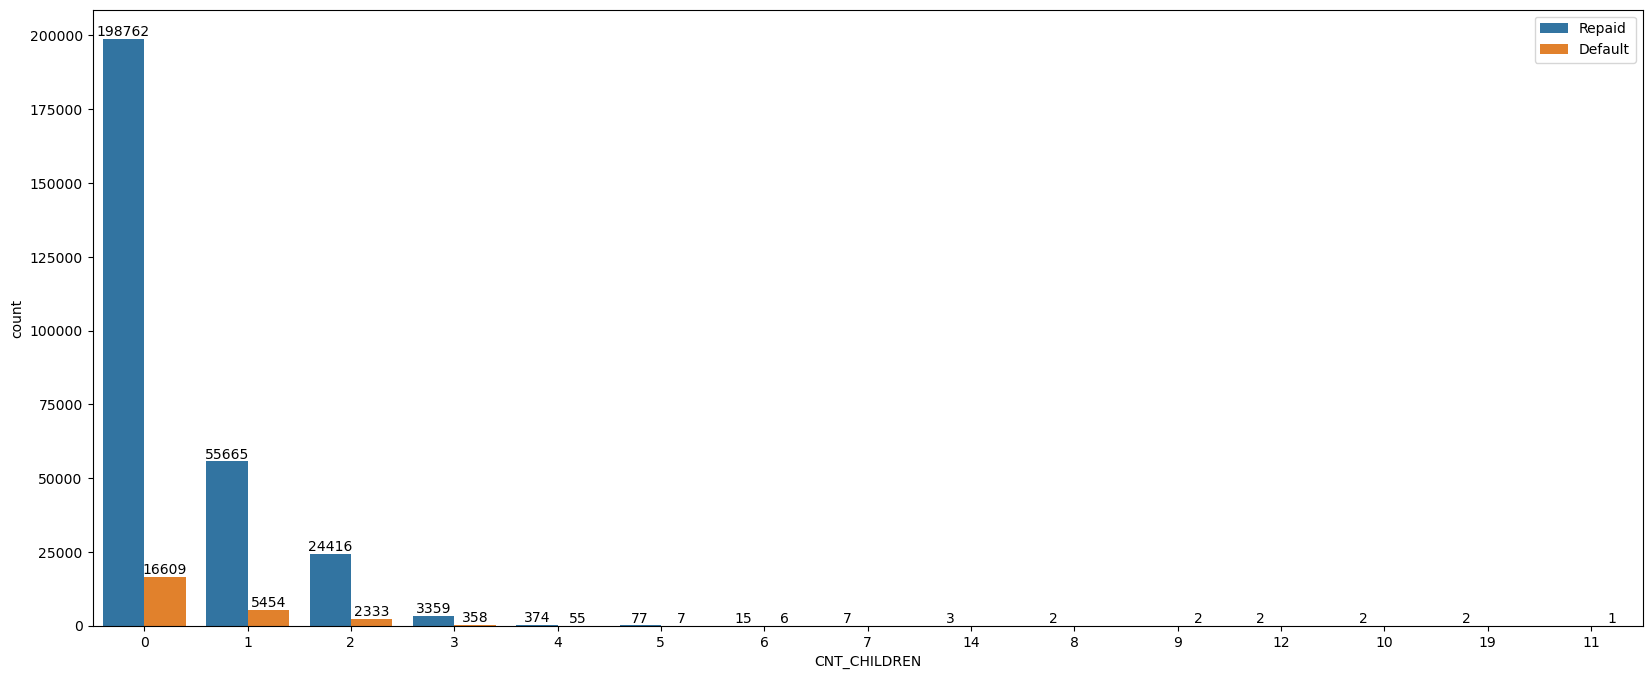

In [59]:
#Data distribution based on applicant's children count.
plot_feature_count(df, "CNT_CHILDREN", figsize = (20, 8))

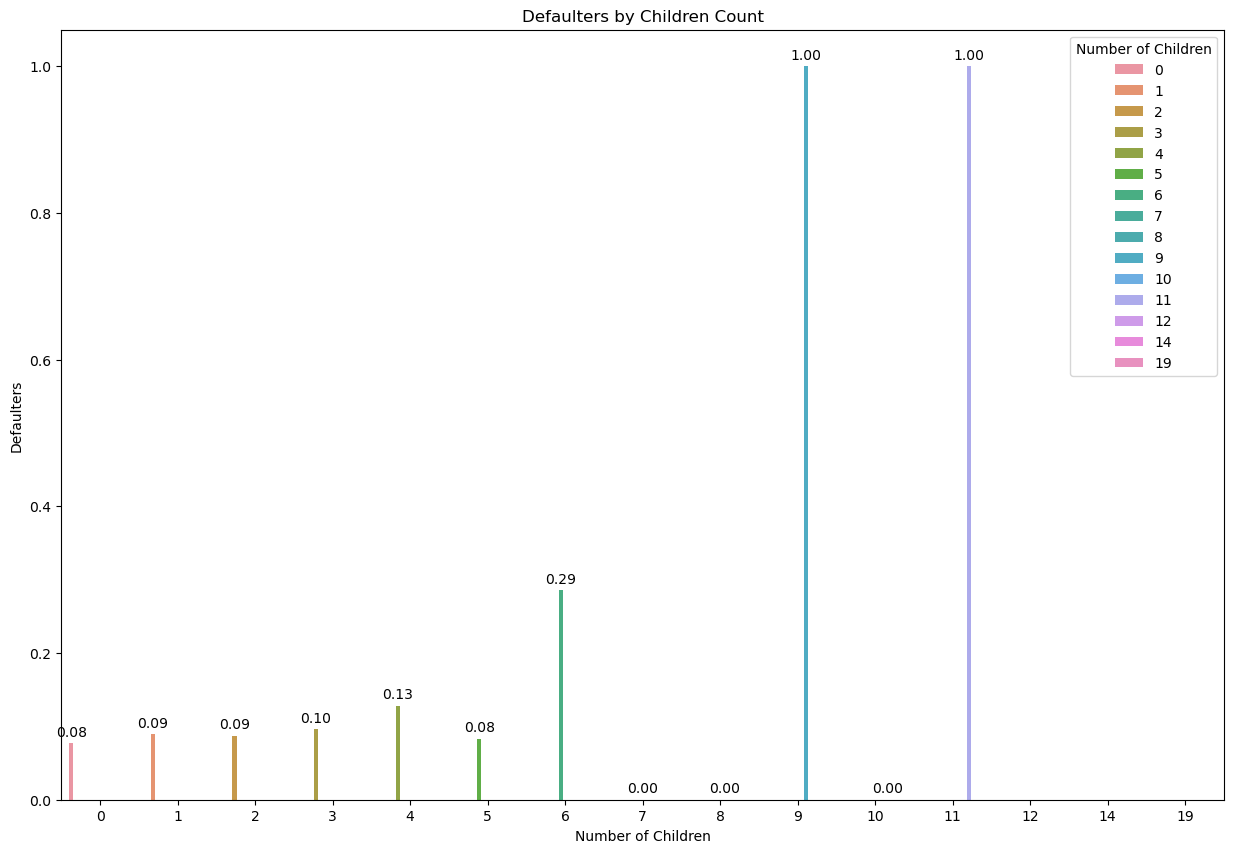

In [60]:
# Defaulters by Children Count
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='CNT_CHILDREN', y='TARGET', hue='CNT_CHILDREN', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Children Count')
plt.xlabel('Number of Children')
plt.legend(title='Number of Children')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[5], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[6], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[7], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[8], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[9], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[10], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[11], label_type='edge', fontsize=10, padding=3, fmt='%.2f')


plt.show()

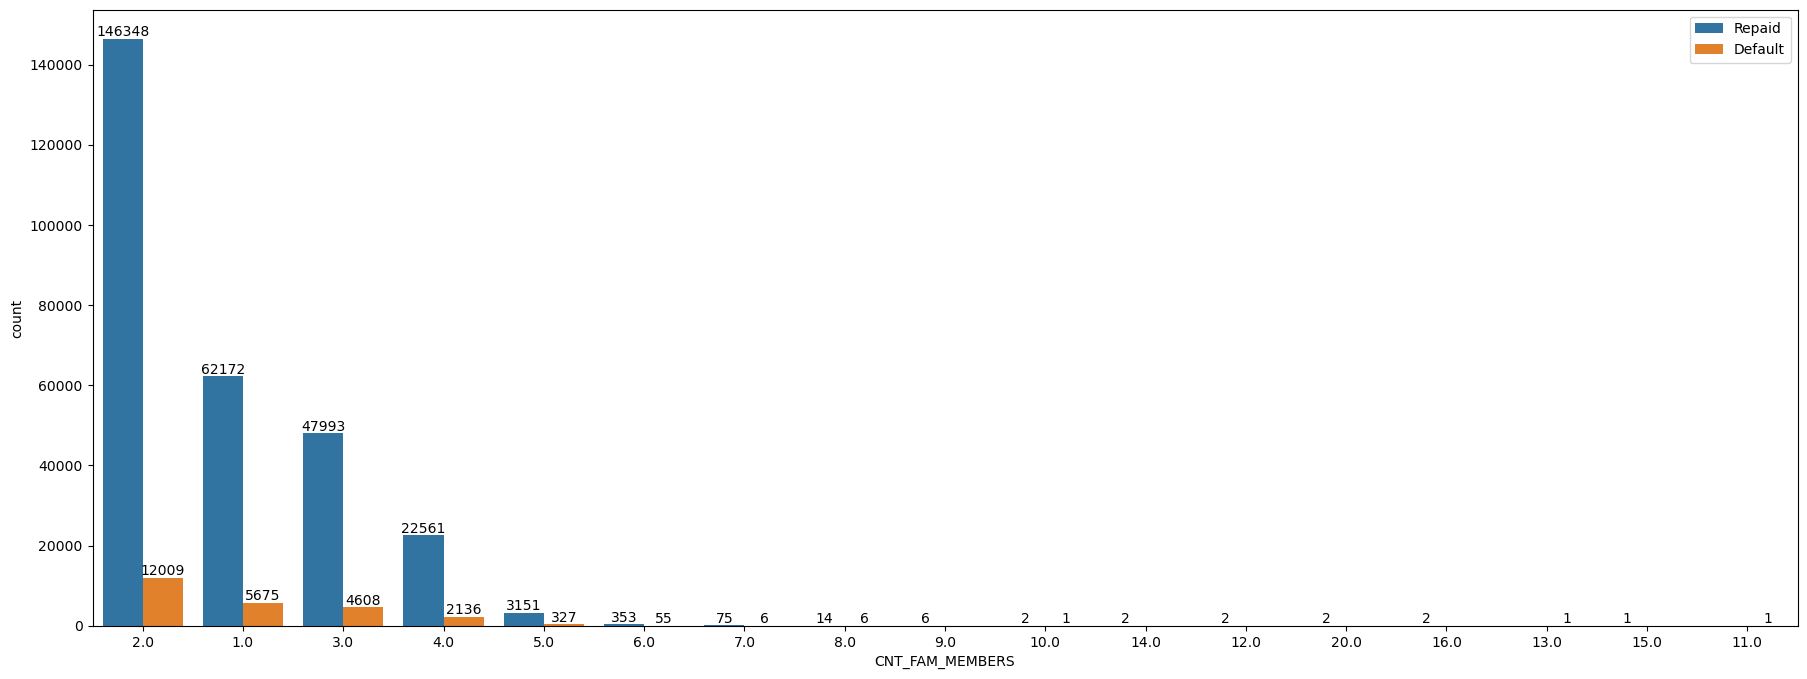

In [61]:
##Data distribution based on applicant's family members count.
plot_feature_count(df, "CNT_FAM_MEMBERS", figsize = (22, 8))

[Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, 3, '0.06')]

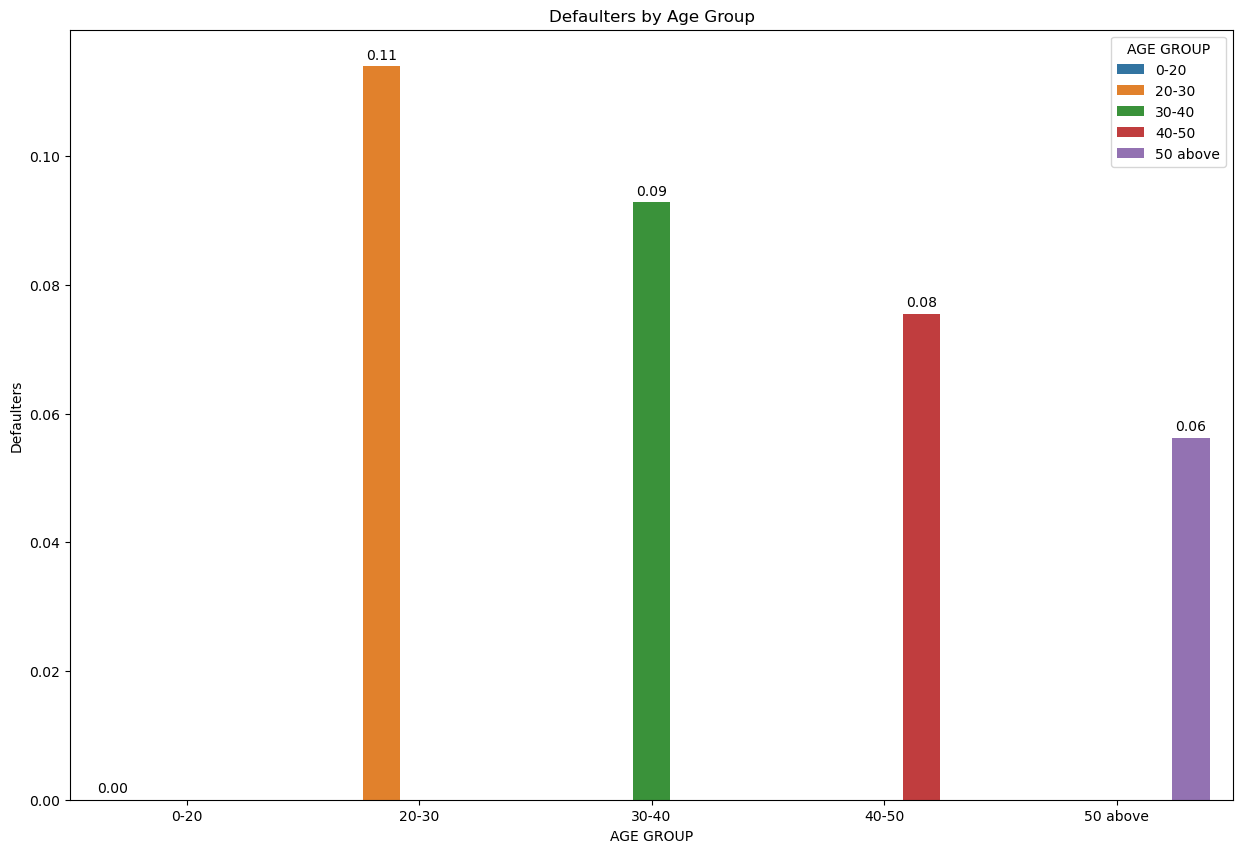

In [62]:
# Defaulters by Age group 
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='AGE_GROUP', y='TARGET', hue='AGE_GROUP', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Age Group')
plt.xlabel('AGE GROUP')
plt.legend(title='AGE GROUP')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

[Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, ''),
 Text(0, -3, '')]

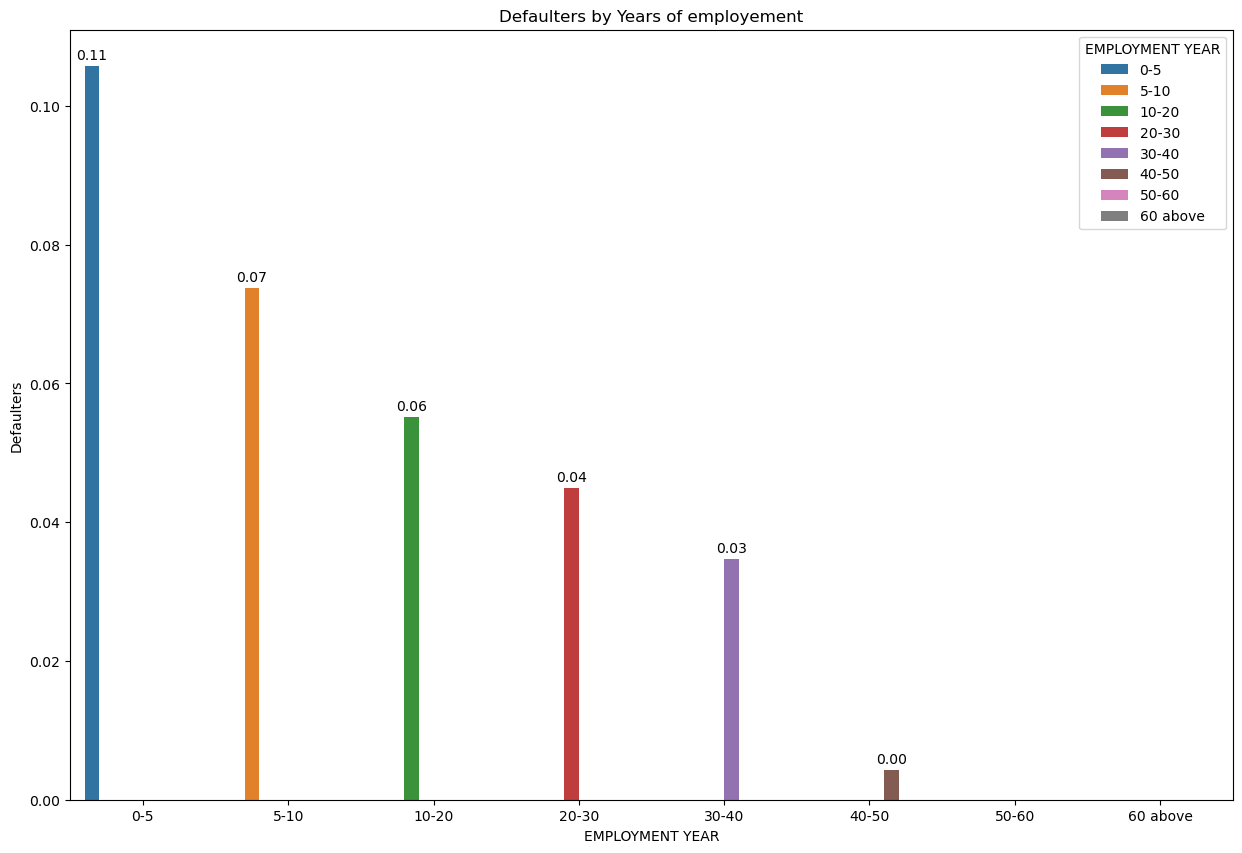

In [64]:
fig, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data=df, x='EMPLOYMENT_YEAR', y='TARGET', hue='EMPLOYMENT_YEAR', ax=ax, ci=None)

plt.ylabel('Defaulters')
plt.title('Defaulters by Years of employement')
plt.xlabel('EMPLOYMENT YEAR')
plt.legend(title='EMPLOYMENT YEAR')  

ax.bar_label(ax.containers[0], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[1], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[2], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[3], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[4], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[5], label_type='edge', fontsize=10, padding=3, fmt='%.2f')

ax.bar_label(ax.containers[6], label_type='edge', fontsize=10, padding=3, fmt='%.2f')


ax.bar_label(ax.containers[7], label_type='edge', fontsize=10, padding=3, fmt='%.2f')



In [37]:
df.to_excel('New_df_LOAN.xlsx', index=False)

# Insights


- Cash loans are 90% of the loans given out and so should have a restrictive criteria as these are the loans with a higher default rate (8.2 %) which means a bigger finanical hit. 
- There are less Male applicants for loans but they have a higher default rate than females.
- Applicants who live on rent or live with their parents default more often than home owners. 
- People with income type maternity leave and unemployed have the highest default rate of 40% and 36% respectively. The amount of applicants in these two categories are neglible therefore no considerbale finanial law is incurred. 
- Working makes up the largest part of income type with 52% (approx) and also have the high default rate of 10%.
- Single and Civil married people both tie for the highest default rate of 10% and poeple in this demograph shoul be screened well. 
- Education plays a big role in understanding the applicant's behaviour. Applicants with academic degrees make the lowest proportion of the applicants and they also have the lowest default rate of 2% . 
- Applicants with Lower Secondary and Secondary/Special Secondary Education Type have the highest default rates with 11% and 9% respectively but our focus should be on Secondary/Special Secondary as it makes the biggest pool of loan applicants with a extremely high default rate. 
- Applicants living in Region 3 have the highest default rate of 11%.
-Focusing on only 0,1,2 and 3 number of children as these are the datapoints where most of the data is concentrated. All these categories have relatively similar default rates. 
- Applicants netween the age of 20-30 have the highest default rate of 11% where as those above 50 years have the lowest default rate of 6%. 
-Applicants with a long term stable employement history default on the loan less. Applicants who have been employed for 40 years or above have a 0% default rate whereas those employed for less than 5 years have the highest default rate of 11%.

We should reevaluate  and refine our lending strategy  by taking into account the above mentioned insights. 